
Training Data:
Number of images: 50000
Shape of images array: (50000, 784)
Number of labels: 50000
Unique labels: [0 1 2 3 4 5 6 7 8 9]

Validation Data:
Number of images: 10000
Shape of images array: (10000, 784)
Number of labels: 10000
Unique labels: [0 1 2 3 4 5 6 7 8 9]

Test Data:
Number of images: 10000
Shape of images array: (10000, 784)
Number of labels: 10000
Unique labels: [0 1 2 3 4 5 6 7 8 9]
Epoch 1: 0.9228
Epoch 2: 0.9383
Epoch 3: 0.9467
Epoch 4: 0.9509
Epoch 5: 0.9548
Epoch 6: 0.9563
Epoch 7: 0.9578
Epoch 8: 0.9582
Epoch 9: 0.9587
Epoch 10: 0.9615
Epoch 11: 0.9615
Epoch 12: 0.9628
Epoch 13: 0.9632
Epoch 14: 0.963
Epoch 15: 0.9648
Epoch 16: 0.9641
Epoch 17: 0.9648
Epoch 18: 0.9654
Epoch 19: 0.9652
Epoch 20: 0.9653
Epoch 21: 0.965
Epoch 22: 0.964
Epoch 23: 0.965
Epoch 24: 0.9653
Epoch 25: 0.9656
Epoch 26: 0.9661
Epoch 27: 0.9659
Epoch 28: 0.9648
Epoch 29: 0.9648
Epoch 30: 0.9644


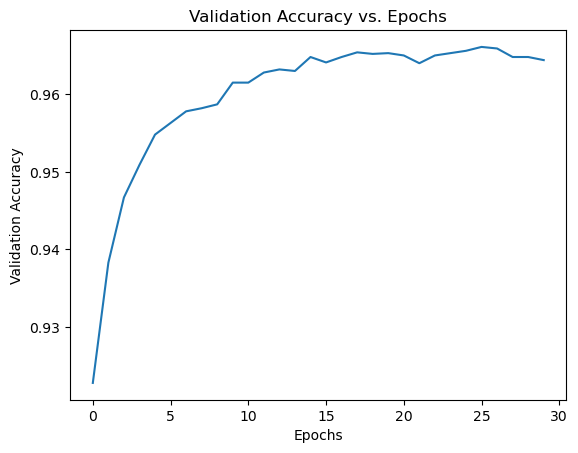

Accuracy on test data: 0.9616


In [1]:
"""
The mnist.pkl.gz file is a gzipped version of a Python pickle file that contains the MNIST dataset. The structure of the unzipped pickle file is as follows:

1.Training Set: This set is usually used to train the model.

Images: A 2D array of shape (50000, 784). Each row corresponds to a flattened version of a 28x28 pixel image of a handwritten digit. The 784 values (28x28) are the pixel values (ranging from 0 to 255).
Labels: A 1D array of shape (50000,). Each entry is an integer from 0 to 9 representing the label of the corresponding image.

2.Validation Set: This set is typically used for tuning hyperparameters, and to avoid overfitting on the training data.

Images: A 2D array of shape (10000, 784). Same structure as the training images.
Labels: A 1D array of shape (10000,). Each entry represents the label of the corresponding image.

3.Test Set: This set is used to evaluate the performance of the model after training.

Images: A 2D array of shape (10000, 784). Same structure as the training and validation images.
Labels: A 1D array of shape (10000,). Each entry represents the label of the corresponding image.
"""


# Import necessary libraries:
# numpy: A library for numerical computing in Python.
# pickle: A module to serialize (convert data structures to bytes) and deserialize (convert bytes back to data structures) in Python.
# gzip: A module to work with GZipped files.
import numpy as np
import pickle
import gzip
import matplotlib.pyplot as plt


# Load the MNIST dataset from pickle file
def load_mnist(mnist):
    # Use the "gzip.open" function to open the gzipped pickle file.
    # 'rb' stands for 'read binary' because the file is a binary file.
    with gzip.open(mnist, 'rb') as f:
        # The "encoding='bytes'" is used because this pickle file might have been created with Python 2, 
        # and we're reading it with Python 3. This ensures compatibility.
        training_data, validation_data, test_data = pickle.load(f, encoding='bytes')
    return training_data, validation_data, test_data

# Convert number labels to one-hot encoding
# np.eye creates an identity matrix of size num_classes x num_classes.
def one_hot_encode(labels, num_classes=10):
    return np.eye(num_classes)[labels]

# Load the MNIST dataset
train_data, valid_data, test_data = load_mnist('mnist.pkl.gz')

# Quick inspection
datasets = {"Training": train_data, "Validation": valid_data, "Test": test_data}

for name, data in datasets.items():
    images, labels = data
    print(f"\n{name} Data:")
    print(f"Number of images: {len(images)}")
    print(f"Shape of images array: {images.shape}")
    print(f"Number of labels: {len(labels)}")
    print(f"Unique labels: {np.unique(labels)}")

# Convert labels to one-hot encoding
train_images, train_labels = train_data
train_labels = one_hot_encode(train_labels)

valid_images, valid_labels = valid_data
valid_labels = one_hot_encode(valid_labels)

test_images, test_labels = test_data
test_labels = one_hot_encode(test_labels)

# Define the Neural Network
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.weights_input_hidden = np.random.randn(input_size, hidden_size) * 0.01
        self.weights_hidden_output = np.random.randn(hidden_size, output_size) * 0.01
        self.bias_hidden = np.zeros(hidden_size)
        self.bias_output = np.zeros(output_size)

    def sigmoid(self, z):
        return 1.0 / (1.0 + np.exp(-z))

    def forward(self, x):
        self.z_hidden = np.dot(x, self.weights_input_hidden) + self.bias_hidden
        self.a_hidden = self.sigmoid(self.z_hidden)
        self.z_output = np.dot(self.a_hidden, self.weights_hidden_output) + self.bias_output
        self.a_output = self.sigmoid(self.z_output)
        return self.a_output
    """ 
    def train(self, training_data, epochs, mini_batch_size, learning_rate):
        for epoch in range(epochs):
            np.random.shuffle(training_data)
            mini_batches = [
                training_data[k:k+mini_batch_size] for k in range(0, len(training_data), mini_batch_size)
            ]

            for mini_batch in mini_batches:
                self.update_mini_batch(mini_batch, learning_rate)

            # Print the training progress:
            print(f"Epoch {epoch + 1}: {accuracy(self, valid_images, valid_labels)}")    
    """
    def train(self, training_data, epochs, mini_batch_size, learning_rate):
        validation_accuracies = []  # Create an empty list to store validation accuracies

        for epoch in range(epochs):
            np.random.shuffle(training_data)
            mini_batches = [
                training_data[k:k+mini_batch_size] for k in range(0, len(training_data), mini_batch_size)
                ]
            
            for mini_batch in mini_batches:
                self.update_mini_batch(mini_batch, learning_rate)

            # Calculate and store the accuracy for this epoch
            acc = accuracy(self, valid_images, valid_labels)
            validation_accuracies.append(acc)
            print(f"Epoch {epoch + 1}: {acc}")
    
        # Plot the validation accuracies
        plt.plot(validation_accuracies)
        plt.xlabel('Epochs')
        plt.ylabel('Validation Accuracy')
        plt.title('Validation Accuracy vs. Epochs')
        plt.show()

    
    
    
    
    
    def update_mini_batch(self, mini_batch, learning_rate):
        sum_gradient_wih = np.zeros(self.weights_input_hidden.shape)
        sum_gradient_who = np.zeros(self.weights_hidden_output.shape)
        sum_gradient_bh = np.zeros(self.bias_hidden.shape)
        sum_gradient_bo = np.zeros(self.bias_output.shape)

        for x, y in mini_batch:
            gradient_wih, gradient_who, gradient_bh, gradient_bo = self.backpropagate(x, y)
            sum_gradient_wih += gradient_wih
            sum_gradient_who += gradient_who
            sum_gradient_bh += gradient_bh
            sum_gradient_bo += gradient_bo

        self.weights_input_hidden -= learning_rate * sum_gradient_wih / len(mini_batch)
        self.weights_hidden_output -= learning_rate * sum_gradient_who / len(mini_batch)
        self.bias_hidden -= learning_rate * sum_gradient_bh / len(mini_batch)
        self.bias_output -= learning_rate * sum_gradient_bo / len(mini_batch)

    def backpropagate(self, x, y):
        self.forward(x)
        error_output = mse_prime(y, self.a_output) * sigmoid_prime(self.a_output)
        error_hidden = np.dot(error_output, self.weights_hidden_output.T) * sigmoid_prime(self.a_hidden)
        gradient_wih = np.dot(x.reshape(-1, 1), error_hidden.reshape(1, -1))
        gradient_who = np.dot(self.a_hidden.reshape(-1, 1), error_output.reshape(1, -1))
        return gradient_wih, gradient_who, error_hidden, error_output

def mse(y_true, y_pred):
    ##return np.mean((y_true - y_pred) ** 2)
    return np.sum((y_pred - y_true) ** 2) / (2 * len(y_true))

def mse_prime(y_true, y_pred):
    return (y_pred - y_true)
    ##return np.mean(y_pred - y_true)

def sigmoid_prime(x):
    return x * (1 - x)

def accuracy(network, data_images, data_labels):
    results = [(np.argmax(network.forward(x)), np.argmax(y)) for x, y in zip(data_images, data_labels)]
    return sum(int(x == y) for (x, y) in results) / len(data_images)

# Train the neural network
nn = NeuralNetwork(784, 31, 10)
nn.train(list(zip(train_images, train_labels)), epochs=30, mini_batch_size=10, learning_rate=0.5)

# Test the neural network
print("Accuracy on test data:", accuracy(nn, test_images, test_labels))
